In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
products = pd.read_csv('data/products.csv')

In [3]:
products.shape

(10348, 10)

In [4]:
products.head()

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price
0,0,Blush - Orgasm,Leahmoriah4,44-55,a month ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,65%,4.1,4
1,1,Blush - Orgasm,Avalonian1172,30-35,2 months ago,I have to mention that the case is fabulous. A...,4.0,65%,4.1,4
2,2,Blush - Orgasm,summerseabreeze,30-35,4 months ago,A coral-pink peach blush with a very fine gold...,5.0,65%,4.1,4
3,3,Blush - Orgasm,miransees,30-35,5 months ago,"I'm not sure if it's a ""Universal"" color. It's...",3.0,65%,4.1,4
4,4,Blush - Orgasm,outofherhead,56 & Over,6 months ago,The blush that works for everyone does not wor...,2.0,65%,4.1,4


In [5]:
products.ratings.value_counts()

5.0    5562
4.0    2392
3.0    1403
2.0     672
1.0     319
Name: ratings, dtype: int64

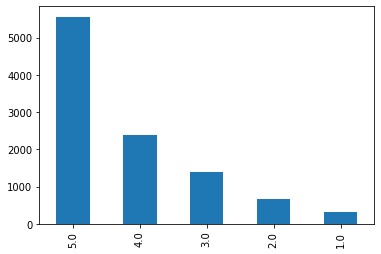

In [6]:
products.ratings.value_counts().plot(kind='bar')

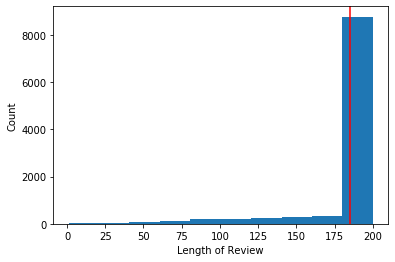

In [7]:
review_length = products.review.apply(lambda x: len(x))

plt.hist(review_length)
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.axvline(x=review_length.mean(), color='red')

In [8]:
review_length.mean()

185.2882682643989

In [9]:
products.age.value_counts()

19-24        3747
25-29        2538
30-35        1600
36-43         873
Under 18      872
44-55         383
56 & Over      88
Name: age, dtype: int64

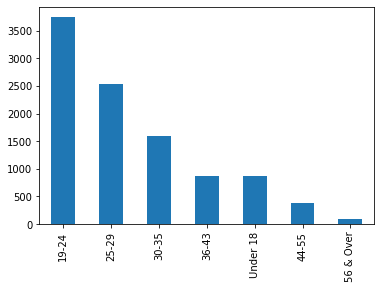

In [10]:
products.age.value_counts().plot(kind='bar')

In [11]:
products.date.value_counts()

11 years ago     1281
12 years ago     1248
10 years ago     1143
13 years ago      860
17 years ago      759
9 years ago       759
16 years ago      746
14 years ago      689
15 years ago      654
18 years ago      575
8 years ago       537
7 years ago       368
6 years ago       238
5 years ago       134
19 years ago      121
4 years ago        98
3 years ago        52
2 years ago        33
20 years ago       20
a year ago         17
6 months ago        4
10 months ago       3
9 months ago        2
a month ago         2
7 months ago        2
5 months ago        1
4 months ago        1
2 months ago        1
Name: date, dtype: int64

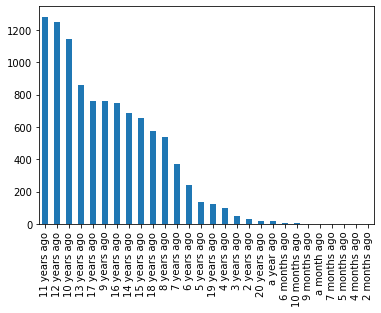

In [12]:
products.date.value_counts().plot(kind='bar')

In [13]:
products.packaging.value_counts()

4.1    5579
4.2    2351
4.3    2108
4.4     310
Name: packaging, dtype: int64

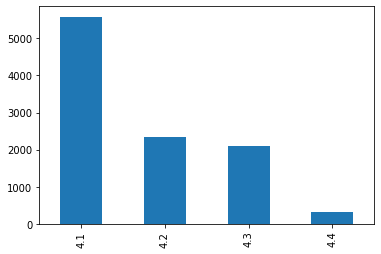

In [14]:
products.packaging.value_counts().plot(kind='bar')

In [15]:
products.isnull().sum()

index           0
product         0
user_id         0
age           247
date            0
review          0
ratings         0
repurchase      0
packaging       0
price           0
dtype: int64

In [16]:
products.user_id.value_counts()

LayoverLifestyle      13
kathrynb23            12
JGardella             11
carrasco              10
izzybella              9
ruby_tea_roses         9
tenderheart003         9
GimpyPoop              8
Katie75007             8
stilagrrrl             8
syeung2                8
pakirani               8
pmnixa                 7
bunny207               7
Cygentte3              7
DanielleWilliams       7
JessiDayle             7
LaciP504               7
ashergill              7
MsPsylocke             7
trempot                7
Hothead                7
sarahfeeni             7
mulletoftruth          6
mriaow                 6
Horny                  6
umalin                 6
sanrosee               6
maliastyle             6
fabs162                6
                      ..
sweetie1528            1
andycobbdds            1
25cent                 1
kimorris               1
MCNALS                 1
CherryKissesXoXoXo     1
lolsann                1
kar126                 1
sminkedokka            1


In [17]:
# Assign Label
products['repurchase'] = products['ratings'].apply(lambda x: 0 if x < 4 else 1 )
products.repurchase.value_counts()

1    7954
0    2394
Name: repurchase, dtype: int64

In [18]:
# Drop older years and group months to first year
products['date_years'] = products.date.apply(lambda x: x.split(" ")[0] if 'year' in x else 1)
products['date_years'] = products.date_years.apply(lambda x: 1 if x=='a' else int(x))

products = products[products['date_years'] <= 13]
products.shape

(6784, 11)

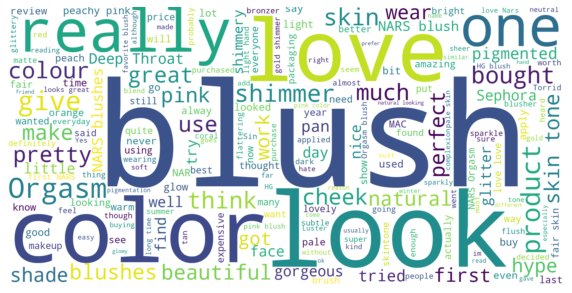

In [19]:
from wordcloud import WordCloud
#Wordcloud for Reviews
all_reviews = " ".join(r for r in products.review)

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

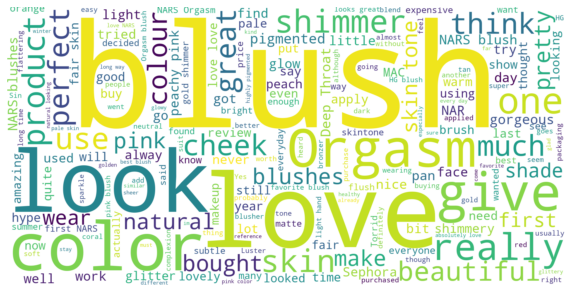

In [20]:
#Wordcloud for Reviews with repurchase = 1
products_repurchase = products[products.repurchase == 1]
all_repurchase_reviews = " ".join(r for r in products_repurchase.review)

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_repurchase_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

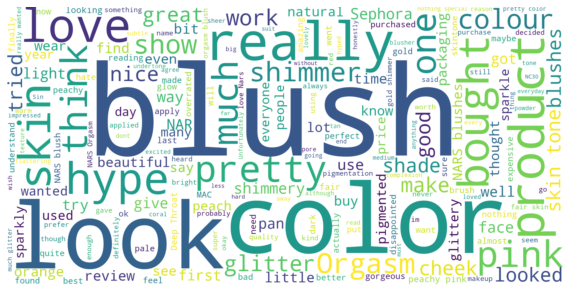

In [21]:
#Wordcloud for Reviews with repurchase = 0
products_no_repurchase = products[products.repurchase == 0]
all_no_repurchase_reviews = " ".join(r for r in products_no_repurchase.review)

# Create and generate a word cloud image
wordcloud = WordCloud(background_color="white", width=2000, height=1000).generate(all_no_repurchase_reviews)

# Display the generated image
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [22]:
import re
#Top 10 Words
tokens = products.review.apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(10)

,word,occurences
734,I,6402.0
1417,a,3757.0
1534,and,3543.0
4715,the,3243.0
3132,it,2840.0
4736,this,2454.0
3125,is,2448.0
4774,to,1851.0
1879,but,1825.0
3517,my,1782.0


In [23]:
#Top 10 Words for repurchase = 1
tokens = products_repurchase.review.apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(10)

,word,occurences
620,I,4817.0
1196,a,2946.0
1302,and,2760.0
4059,the,2344.0
2691,it,2086.0
2686,is,1939.0
4077,this,1826.0
3037,my,1421.0
4109,to,1371.0
1505,blush,1347.0


In [24]:
#Top 10 Words for repurchase = 0
tokens = products_no_repurchase.review.apply(lambda row: row.split(" "))

words = tokens.apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                  .sum(axis=0)\
                  .to_frame()\
                  .reset_index()\
                  .sort_values(by=0,ascending=False)

words.columns = ['word','occurences']

words.head(10)

,word,occurences
271,I,1585.0
2185,the,899.0
564,a,811.0
624,and,783.0
1390,it,754.0
2200,this,628.0
797,but,556.0
1384,is,509.0
2222,to,480.0
1636,on,430.0


# Preprocessing

In [40]:
test = products.review.iloc[0]
test

"I'm 48, Caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why I LOVE this blush.  I love the shimmer on my cheek bones and temples and use..."

In [25]:
# Remove urls
def remove_urls(text):
  text = re.sub(r'http.?://[^\s]+[\s]?', '', text)
  text = re.sub(r'[^\s]+.com', '', text)
  return re.sub(r'www.[^\s]+', '', text)

In [41]:
# Lowercase
def to_lower(text):
    return text.lower()

to_lower(test)

"i'm 48, caucasian with olive undertones so true pinks and mauves look terrible and corals are perfect which is why i love this blush.  i love the shimmer on my cheek bones and temples and use..."

In [46]:
pip install contractions

  Using cached https://files.pythonhosted.org/packages/0a/04/d5e0bb9f2cef5d15616ebf68087a725c5dbdd71bd422bcfb35d709f98ce7/contractions-0.0.48-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/d3/fe/021d7d76961b5ceb9f8d022c4138461d83beff36c3938dc424586085e559/textsearch-0.0.21-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/c7/61370d9e3c349478e89a5554c1e5d9658e1e3116cc4f2528f568909ebdf1/anyascii-0.1.7-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/4a/92/b3c70b8cf2b76f7e3e8b7243d6f06f7cb3bab6ada237b1bce57604c5c519/pyahocorasick-1.4.1.tar.gz
  Running setup.py clean for pyahocorasick
Failed to build pyahocorasick
  Running setup.py install for pyahocorasick: started
    Running setup.py install for pyahocorasick: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.
  ERROR: Complete output from command 'C:\Users\carin\Anaconda3\python.exe' -u -c 'import setuptools, t

In [47]:
import contractions

ModuleNotFoundError: No module named 'contractions'

In [45]:
# Expand Contractions
import contractions as contract
def expand_contractions(text):
    return contract.fix(text)

ModuleNotFoundError: No module named 'contractions'

In [30]:
# Remove digits, symbols
def remove_symbols_digits(text):
    return re.sub('[^a-zA-Z\s]', '', text)

In [31]:
# Stopwords Removal
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop = stopwords.words('english')
reviews['review_processed'] = reviews['review_processed'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\carin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\carin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


NameError: name 'reviews' is not defined

In [32]:
# Lemmatization
from textblob import Word
reviews['review_processed'] = reviews['review_processed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

NameError: name 'reviews' is not defined

In [33]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['lemmatized']=df['cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

ModuleNotFoundError: No module named 'spacy'

In [34]:
# Remove extra whitespaces
def remove_whitespace(text):
    text = text.strip()
    return " ".join(text.split())

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

NameError: name 'X' is not defined

In [ ]:
# CountVectorizer
vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [ ]:
# TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

In [ ]:
# Word Embeddings

# Feature Engineering

### Sentiment Analysis

In [21]:
from textblob import TextBlob

# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    
    # use this line for Python 2 (avoids UnicodeDecodeError for some reviews)
    # blob = TextBlob(text.decode(encoding='utf-8'))
    
    # use this line instead for Python 3
    blob = TextBlob(text)
    
    # return the polarity
    return blob.sentiment.polarity

In [22]:
# create a new DataFrame column for sentiment
products['sentiment'] = products.review.apply(detect_sentiment)
products.head()

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,date_years,sentiment
0,0,Blush - Orgasm,Leahmoriah4,44-55,a month ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,1,4.1,4,1,0.270000
1,1,Blush - Orgasm,Avalonian1172,30-35,2 months ago,I have to mention that the case is fabulous. A...,4.0,1,4.1,4,1,0.276667
2,2,Blush - Orgasm,summerseabreeze,30-35,4 months ago,A coral-pink peach blush with a very fine gold...,5.0,1,4.1,4,1,0.520833
3,3,Blush - Orgasm,miransees,30-35,5 months ago,"I'm not sure if it's a ""Universal"" color. It's...",3.0,0,4.1,4,1,0.100000
4,4,Blush - Orgasm,outofherhead,56 & Over,6 months ago,The blush that works for everyone does not wor...,2.0,0,4.1,4,1,0.025000


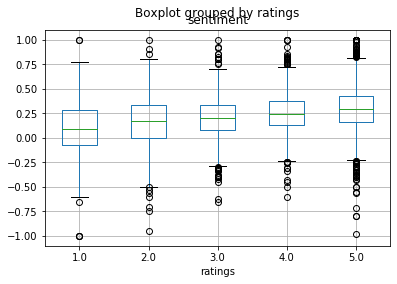

In [23]:
products.boxplot('sentiment', by='ratings')

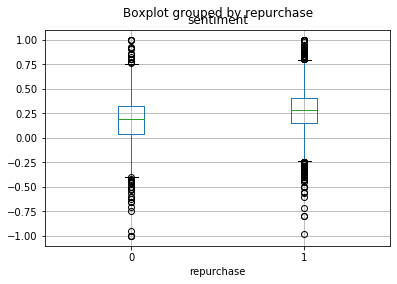

In [24]:
products.boxplot('sentiment', by='repurchase')

In [35]:
# replace sentiment score by yearly average
products_groups = products.groupby(['date_years'])
products_groups = [products_groups.get_group(x) for x in products_groups.groups]

for group in products_groups:
    mean_sentiment = group.sentiment.mean()
    products.loc[products.date_years == group.date_years.iloc[0],'sentiment'] = mean_sentiment

products.head()

,index,product,user_id,age,date,review,ratings,repurchase,packaging,price,date_years,sentiment
0,0,Blush - Orgasm,Leahmoriah4,44-55,a month ago,"I'm 48, Caucasian with olive undertones so tru...",5.0,1,4.1,4,1,0.248343
1,1,Blush - Orgasm,Avalonian1172,30-35,2 months ago,I have to mention that the case is fabulous. A...,4.0,1,4.1,4,1,0.248343
2,2,Blush - Orgasm,summerseabreeze,30-35,4 months ago,A coral-pink peach blush with a very fine gold...,5.0,1,4.1,4,1,0.248343
3,3,Blush - Orgasm,miransees,30-35,5 months ago,"I'm not sure if it's a ""Universal"" color. It's...",3.0,0,4.1,4,1,0.248343
4,4,Blush - Orgasm,outofherhead,56 & Over,6 months ago,The blush that works for everyone does not wor...,2.0,0,4.1,4,1,0.248343


In [36]:
products.date_years.value_counts()

11    1281
12    1248
10    1143
13     860
9      759
8      537
7      368
6      238
5      134
4       98
3       52
2       33
1       33
Name: date_years, dtype: int64

In [37]:
products.sentiment.value_counts()

0.259363    1281
0.266172    1248
0.256669    1143
0.253882     860
0.253888     759
0.256007     537
0.261558     368
0.254848     238
0.249715     134
0.240923      98
0.270675      52
0.248343      33
0.259642      33
Name: sentiment, dtype: int64